In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_HR.csv")

In [3]:
# analysis data set 생성
ads = df.copy()

In [4]:
# 데이터 전처리
# 문자형 변수 숫자형으로 변경
# 1. Yes, No 로 이루어지 변수(퇴사, Over_time)
def yn(x):
    if x in ('Yes', 'Y'):
        return 1
    else:
        return 0
    
# 2. 출장 빈도
def travel(x):
    if x == 'Non-Travel':
        return 1
    elif x == 'Travel_Rarely':
        return 2
    else:
        return 3
   
ads['Attrition'] = ads['Attrition'].apply(yn)
ads['OverTime'] = ads['OverTime'].apply(yn)
ads['BusinessTravel'] = ads['BusinessTravel'].apply(travel)

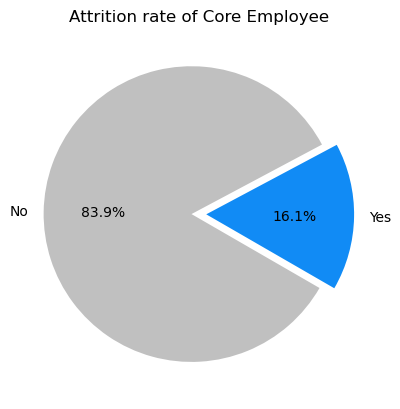

In [5]:
# 직원들의 퇴사율 확인
labels = ['No', 'Yes']
explode = [0.05, 0.05]
colors = ['silver', '#118BF5']
attr_counts = df['Attrition'].value_counts()
plt.pie(attr_counts, autopct='%.1f%%', startangle=330, explode=explode, counterclock=False, colors=colors, labels=labels)
plt.title('Attrition rate of Core Employee')
plt.show()

In [6]:
# 그룹별 퇴사율 확인해보기
# 1. 부서별로 퇴사율의 차이가 있을까?
ads.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278


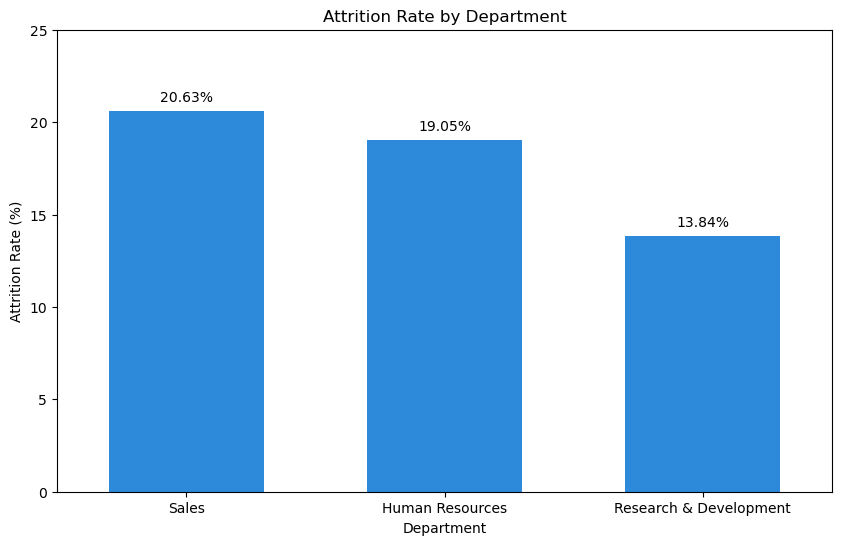

In [7]:
# Department 별로 Attrition의 평균을 계산하여 Attrition 비율을 구함
attrition_rate_by_department = ads.groupby('Department')['Attrition'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate_by_department['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Department', y='Attrition', data=attrition_rate_by_department, color='#118BF5', width=0.6)
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 0.5,   # 세로 위치
            f"{p.get_height():.2f}%",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 25)
plt.show()

In [8]:
# 부서와 맞지 않는 업무를 하는 직원이 있을지 확인
# 모두 부서와 맞는 일을 하고 있음
ads.groupby('Department')['JobRole'].value_counts(normalize=True).unstack()

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Department,,,,,,,,,
Human Resources,NaN,0.825397,NaN,0.174603,NaN,NaN,NaN,NaN,NaN
Research & Development,0.136316,NaN,0.269511,0.056191,0.150884,0.083247,0.30385,NaN,NaN
Sales,NaN,NaN,NaN,0.082960,NaN,NaN,NaN,0.730942,0.186099


In [9]:
# 부서와 전공이 일치하지 않는 직원이 얼마나 될지 확인

# 부서별 맞는 전공은 다음과 같이 정의
# Human Resources의 전공 : Human Resources
# Research & Development : Life Sciences, Medical, Technical Degree
# Sales의 전공 : Marketing

ads.groupby('EducationField')['Department'].value_counts(normalize=True).unstack()

Department,Human Resources,Research & Development,Sales
EducationField,,,
Human Resources,1.000000,NaN,NaN
Life Sciences,0.026403,0.726073,0.247525
Marketing,NaN,NaN,1.000000
Medical,0.028017,0.782328,0.189655
Other,0.036585,0.780488,0.182927
Technical Degree,0.030303,0.712121,0.257576


In [10]:
# 부서와 전공이 일치하면 1, 일치하지 않으면 0으로 새로운 변수 생성

# 새로운 변수 0으로 초기화
ads['Depart_Field_yn'] = 0

# 조건에 따른 값 할당
ads.loc[(ads['Department'] == 'Human Resources') & (ads['EducationField'] == 'Human Resources'), 'Depart_Field_yn'] = 1
ads.loc[(ads['Department'] == 'Research & Development') & (ads['EducationField'].isin(['Life Sciences', 'Medical', 'Technical Degree'])), 'Depart_Field_yn'] = 1
ads.loc[(ads['Department'] == 'Sales') & (ads['EducationField'] == 'Marketing'), 'Depart_Field_yn'] = 1

# 새로운 변수 확인
ads[['Department', 'EducationField', 'Depart_Field_yn']].head()

,Department,EducationField,Depart_Field_yn
0,Sales,Life Sciences,0
1,Research & Development,Life Sciences,1
2,Research & Development,Other,0
3,Research & Development,Life Sciences,1
4,Research & Development,Medical,1


In [11]:
# 부서와 전공 일치 여부에 따른 퇴사 비율 확인
ads.groupby('Depart_Field_yn')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
Depart_Field_yn,,
0,0.821705,0.178295
1,0.844875,0.155125


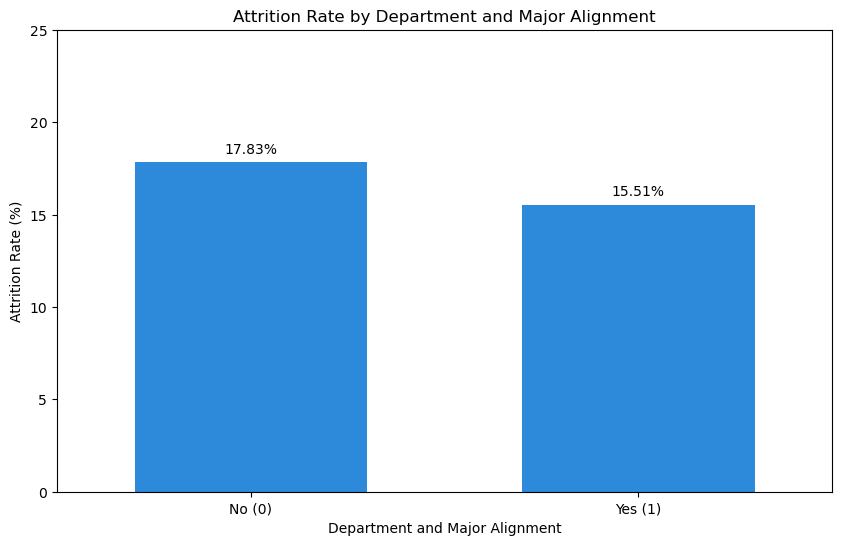

In [12]:
# Department 별로 Attrition의 평균을 계산하여 Attrition 비율을 구함
attrition_rate = ads.groupby('Depart_Field_yn')['Attrition'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='Depart_Field_yn', y='Attrition', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Attrition Rate by Department and Major Alignment')
plt.xlabel('Department and Major Alignment')
plt.ylabel('Attrition Rate (%)')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 0.5,   # 세로 위치
            f"{p.get_height():.2f}%",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 25)
plt.show()

In [13]:
# 귀무가설 : 부서와 전공 일치 여부에 따른 퇴사 비율은 차이가 없다.
# 카이제곱 검정 
# p-value = 0.33으로 귀무가설을 기각할 수 없다.
# 따라서 부서와 전공 일치 여부에 따른 퇴사 비율의 차이가 있다고 보기는 어렵다.
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(ads['Depart_Field_yn'], ads['Attrition'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# p-value 출력
print(f"p-value: {p}")

p-value: 0.3254263342760899


In [14]:
# 업무 만족도 확인
ads.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290


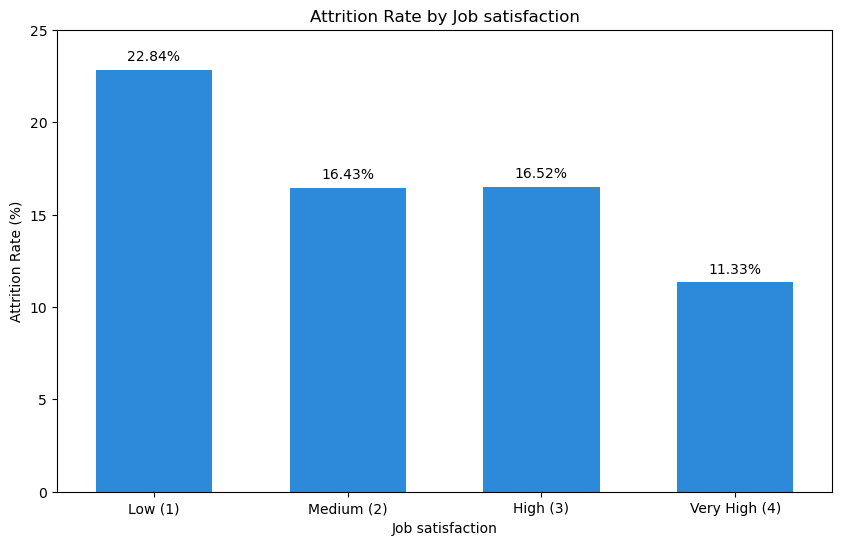

In [15]:
# 업무 만족도 별로 Attrition의 평균을 계산하여 Attrition 비율을 구함
attrition_rate = ads.groupby('JobSatisfaction')['Attrition'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='JobSatisfaction', y='Attrition', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Attrition Rate by Job satisfaction')
plt.xlabel('Job satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low (1)', 'Medium (2)', 'High (3)', 'Very High (4)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 0.5,   # 세로 위치
            f"{p.get_height():.2f}%",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 25)
plt.show()

In [16]:
# 업무 만족도가 Low이면 1 나머지는 2으로 재범주화
ads['JbSf_cat'] = ads['JobSatisfaction'].apply( lambda x : 1 if x == 1 else 2)

# 비율 확인
ads.groupby('JbSf_cat')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
JbSf_cat,,
1,0.771626,0.228374
2,0.855207,0.144793


In [17]:
# 귀무가설 : 업무 만족도에 따른 퇴사 비율은 차이가 없다.
# 카이제곱 검정 
# p-value < 0.05으로 귀무가설을 기각한다.
# 업무 만족도에 따른 퇴사 비율의 차이가 있다.

contingency_table = pd.crosstab(ads['JbSf_cat'], ads['Attrition'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# p-value 출력
print(f"p-value: {p}")

p-value: 0.0007407640457637189


In [18]:
# 그렇다면 부서, 전공 일치 여부와 업무 만족도는 관련이 없을까?
# 업무 만족도가 높을수록 부서와 전공 일치 비율이 줄어드는 것을 확인할 수 있다.
# 따라서 부서와 전공 일치 비율은 퇴사에 크게 영향을 미치는 요인은 아니라고 판단할 수 있다.
ads.groupby('JobSatisfaction')['Depart_Field_yn'].value_counts(normalize=True).unstack()

Depart_Field_yn,0,1
JobSatisfaction,,
1,0.235294,0.764706
2,0.250000,0.750000
3,0.269231,0.730769
4,0.283224,0.716776


In [19]:
# 일한 회사 수가 많을수록 이직할 확률이 높지 않을까?
ads.groupby('NumCompaniesWorked')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
NumCompaniesWorked,,
0,0.883249,0.116751
1,0.811900,0.188100
2,0.890411,0.109589
3,0.899371,0.100629
4,0.877698,0.122302
5,0.746032,0.253968
6,0.771429,0.228571
7,0.770270,0.229730
8,0.877551,0.122449


In [20]:
# 단변량 로지스틱을 통해 확인
# 오즈비가 1.05로 미미하지만 이전에 일했던 회사의 수가 1단위 증가할때마다 퇴사할 오즈는 1.05씩 증가한다.
import statsmodels.api as sm

# 설명 변수에 상수항 추가
X = sm.add_constant(ads[['NumCompaniesWorked']])
y = ads['Attrition']

# 로지스틱 회귀 모델 구축 및 학습
model = sm.Logit(y, X).fit()

# 모델 요약 결과 출력
print(model.summary())

# 오즈비 계산
print(np.exp(model.params[1]))

Optimization terminated successfully.
         Current function value: 0.440773
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                0.002088
Time:                        12:57:22   Log-Likelihood:                -647.94
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.09963
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7765      0.106    -16.703      0.000      -1.985      -1.568
NumCo

In [21]:
# 2. 근무 강도에 따른 퇴사 비율의 차이가 있을까?
# 출장 빈도별 확인
ads.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
BusinessTravel,,
1,0.920000,0.080000
2,0.850431,0.149569
3,0.750903,0.249097


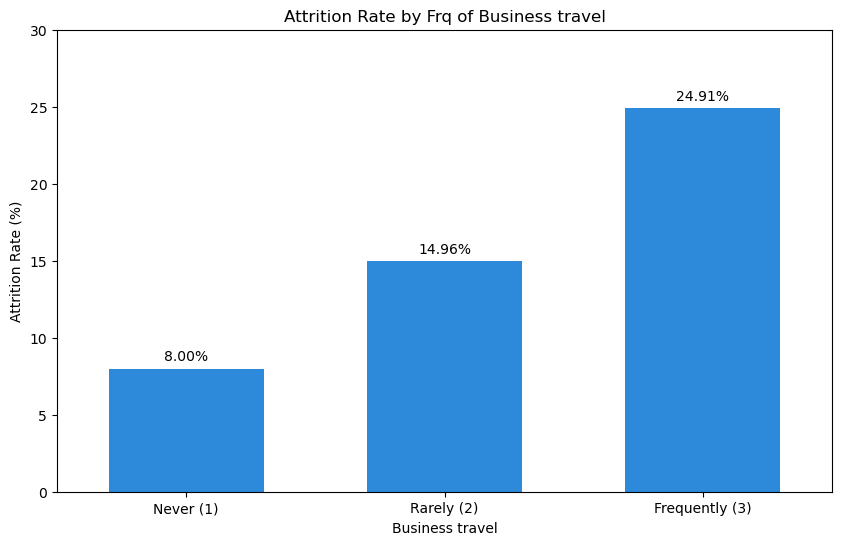

In [22]:
# 출장 빈도 별로 Attrition의 평균을 계산하여 Attrition 비율을 구함
attrition_rate = ads.groupby('BusinessTravel')['Attrition'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='BusinessTravel', y='Attrition', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Attrition Rate by Frq of Business travel')
plt.xlabel('Business travel')
plt.ylabel('Attrition Rate (%)')
plt.xticks(ticks=[0, 1, 2], labels=['Never (1)', 'Rarely (2)', 'Frequently (3)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 0.5,   # 세로 위치
            f"{p.get_height():.2f}%",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 30)
plt.show()

In [23]:
# 귀무가설 : 출장빈도에 따른 퇴사 비율은 차이가 없다.
# 카이제곱 검정 
# p-value < 0.05으로 귀무가설을 기각한다.
# 출장 빈도에 따른 퇴사 비율의 차이가 있다.
contingency_table = pd.crosstab(ads['BusinessTravel'], ads['Attrition'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# p-value 출력
print(f"p-value: {p}")

p-value: 5.608614476449942e-06


In [24]:
# 그렇다면 출장을 자주가는 부서는 어떤 부서일까?
# R&D가 출장을 자주가는 비율이 제일 높았지만 퇴사율이 제일 낮았다.
x = df.groupby('Department')['BusinessTravel'].value_counts(normalize=True).unstack()
x = x[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']]
x

BusinessTravel,Non-Travel,Travel_Rarely,Travel_Frequently
Department,,,
Human Resources,0.095238,0.730159,0.174603
Research & Development,0.100937,0.709677,0.189386
Sales,0.105381,0.706278,0.188341


In [26]:
# 집까지의 거리 확인
ads.groupby('Attrition')['DistanceFromHome'].mean()

Attrition
0     8.915653
1    10.632911
Name: DistanceFromHome, dtype: float64

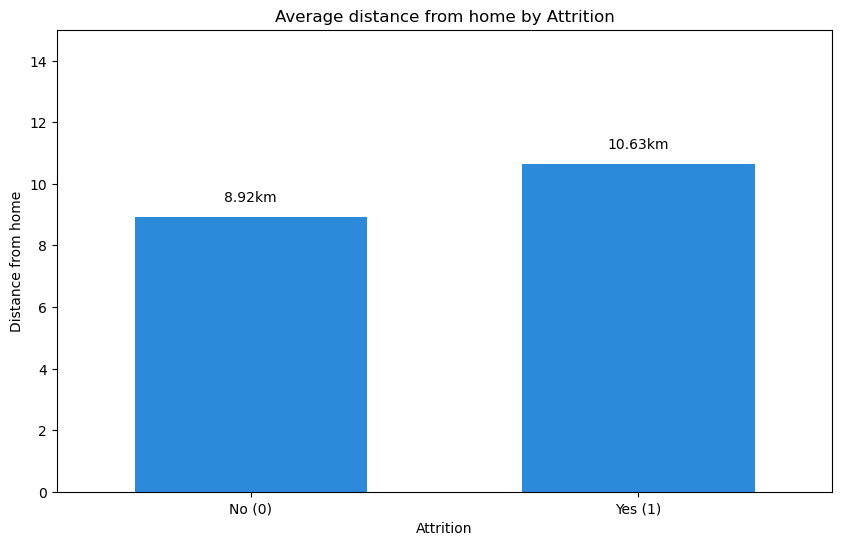

In [27]:
# 퇴사 여부 별 집과 회사의 거리 평균 계산
attrition_rate = ads.groupby('Attrition')['DistanceFromHome'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='Attrition', y='DistanceFromHome', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Average distance from home by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from home')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 0.5,   # 세로 위치
            f"{p.get_height():.2f}km",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 15)
plt.show()

In [28]:
# 귀무가설 퇴사자/비퇴사자의 회사와 집까지의 거리는 차이가 있다.
# t-test
# 유의수준이 0.05보다 작으므로 귀무가설을 기각한다.
# 퇴사자/비퇴사자의 회사와 집까지의 거리는 차이가 있다.
from scipy.stats import ttest_ind

# Attrition이 'Yes'인 그룹과 'No'인 그룹으로 DistanceFromHome 데이터 분리
attr_yes = ads[ads['Attrition'] == 1]['DistanceFromHome']
attr_no = ads[ads['Attrition'] == 0]['DistanceFromHome']

# 독립 표본 t-test 수행
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# p-value 출력
print(f"P-value: {p_value}")

P-value: 0.0027930600802134266


In [29]:
# 워라밸 빈도별 확인
# 워라밸이 'Bad'인 직원들의 퇴사 비율이 높은 것을 확인할 수 있다.
ads.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471


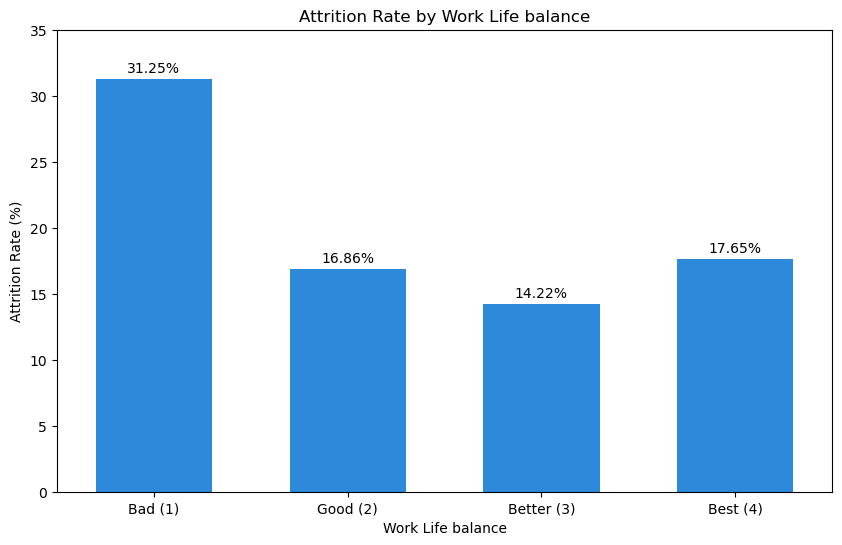

In [30]:
# 워라밸 별로 Attrition의 평균을 계산하여 Attrition 비율을 구함
attrition_rate = ads.groupby('WorkLifeBalance')['Attrition'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='WorkLifeBalance', y='Attrition', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Attrition Rate by Work Life balance')
plt.xlabel('Work Life balance')
plt.ylabel('Attrition Rate (%)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Bad (1)', 'Good (2)', 'Better (3)', 'Best (4)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 0.5,   # 세로 위치
            f"{p.get_height():.2f}%",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 35)
plt.show()

In [31]:
# 워라밸이 Bad이면 1 Good 이상이면 2으로 재범주화
ads['WLB_cat'] = ads['WorkLifeBalance'].apply( lambda x : 1 if x == 1 else 2)

# 비율 확인
ads.groupby('WLB_cat')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
WLB_cat,,
1,0.687500,0.312500
2,0.847482,0.152518


In [32]:
# 귀무가설 : 워라밸에 따른 퇴사 비율은 차이가 없다.
# 카이제곱 검정 
# p-value < 0.05으로 귀무가설을 기각한다.
# 워라밸에 따른 퇴사 비율의 차이가 있다.
contingency_table = pd.crosstab(ads['WLB_cat'], ads['Attrition'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# p-value 출력
print(f"p-value: {p}")

p-value: 0.0002862263020943052


In [33]:
# 업무 환경 만족도 빈도별 확인
# 워라밸과 마찬가지로 업무환경 만족도가 Low인 직원들의 퇴사율이 높음
ads.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529


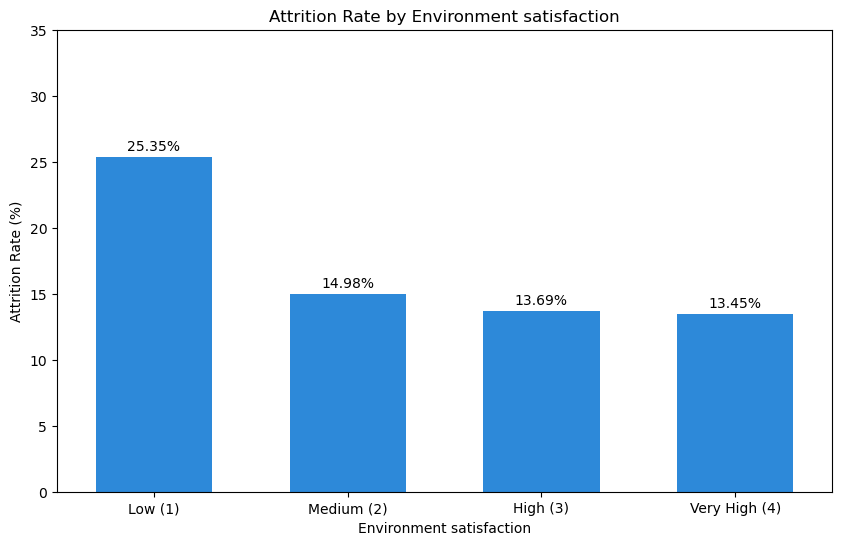

In [34]:
# 업무 환경 만족도 별로 Attrition의 평균을 계산하여 Attrition 비율을 구함
attrition_rate = ads.groupby('EnvironmentSatisfaction')['Attrition'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='EnvironmentSatisfaction', y='Attrition', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Attrition Rate by Environment satisfaction')
plt.xlabel('Environment satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low (1)', 'Medium (2)', 'High (3)', 'Very High (4)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 0.5,   # 세로 위치
            f"{p.get_height():.2f}%",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 35)
plt.show()

In [35]:
# 업무환경 만족도가 Low이면 1 나머지는 2으로 재범주화
ads['EnSf_cat'] = ads['EnvironmentSatisfaction'].apply( lambda x : 1 if x == 1 else 2)

# 비율 확인
ads.groupby('EnSf_cat')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
EnSf_cat,,
1,0.746479,0.253521
2,0.860877,0.139123


In [36]:
# 귀무가설 : 업무환경 만족도에 따른 퇴사 비율은 차이가 없다.
# 카이제곱 검정 
# p-value < 0.05으로 귀무가설을 기각한다.
# 업무환경 만족도에 따른 퇴사 비율의 차이가 있다.
contingency_table = pd.crosstab(ads['EnSf_cat'], ads['Attrition'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# p-value 출력
print(f"p-value: {p}")

p-value: 3.853802847229327e-06


In [37]:
# 규정외 노동 업무 여부별 확인
ads.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
OverTime,,
0,0.895636,0.104364
1,0.694712,0.305288


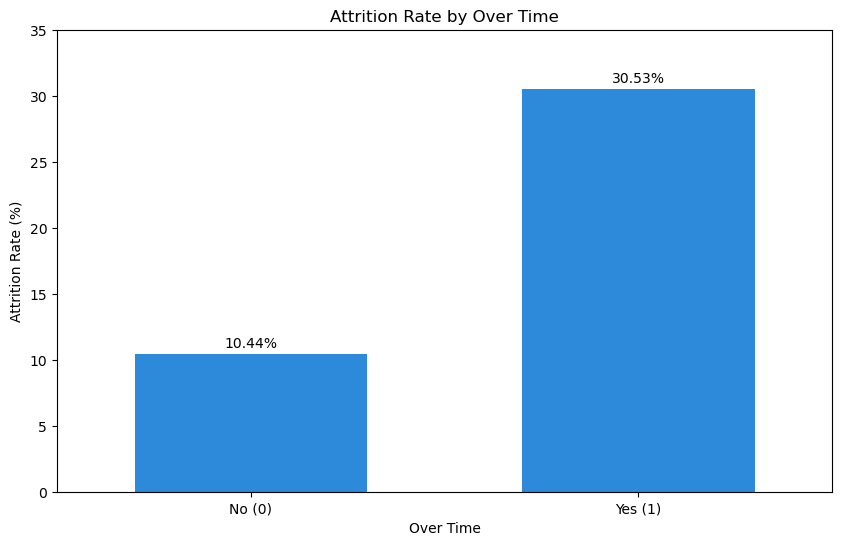

In [38]:
# 규정외 노동 여부 별로 Attrition의 평균을 계산하여 Attrition 비율을 구함
attrition_rate = ads.groupby('OverTime')['Attrition'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='OverTime', y='Attrition', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Attrition Rate by Over Time')
plt.xlabel('Over Time')
plt.ylabel('Attrition Rate (%)')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 0.5,   # 세로 위치
            f"{p.get_height():.2f}%",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 35)
plt.show()

In [39]:
# 귀무가설 : 규정외 노동 업무여부에 따른 퇴사 비율은 차이가 없다.
# 카이제곱 검정 
# p-value < 0.05으로 귀무가설을 기각한다.
# 규정외 노동 업무 여부에 따른 퇴사 비율의 차이가 있다.
contingency_table = pd.crosstab(ads['OverTime'], ads['Attrition'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# p-value 출력
print(f"p-value: {p}")

p-value: 8.15842372153832e-21


In [40]:
# 3. 급여에 따른 퇴사율 차이
# 급여는 경력기간과 연관이 있으므로, 급여를 경력년수로 나눠서 변수 생성
# 경력이 0년이어도 1로 나누는 것으로 정의
# 분포 확인
ads['Income_per_Workyear'] = ads['MonthlyIncome'] / ads['TotalWorkingYears']
ads.loc[ads['TotalWorkingYears'] == 0, 'Income_per_Workyear'] = ads['MonthlyIncome']
ads['Income_per_Workyear'].describe()

count    1470.000000
mean      718.266313
std       485.321703
min       100.050000
25%       417.800000
50%       602.815126
75%       849.945652
max      2994.000000
Name: Income_per_Workyear, dtype: float64

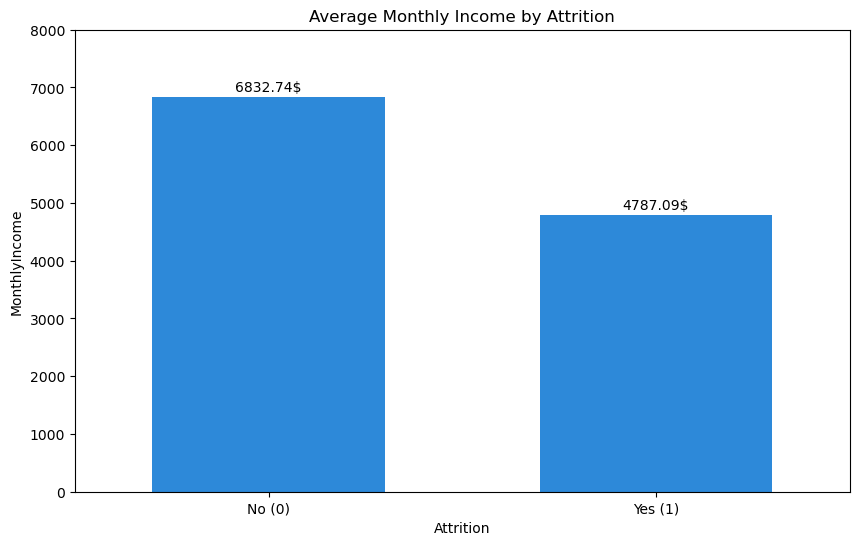

In [41]:
# 퇴사 여부 별 월 급여 평균 계산
attrition_rate = ads.groupby('Attrition')['MonthlyIncome'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='Attrition', y='MonthlyIncome', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Average Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 100,   # 세로 위치
            f"{p.get_height():.2f}$",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 8000)
plt.show()

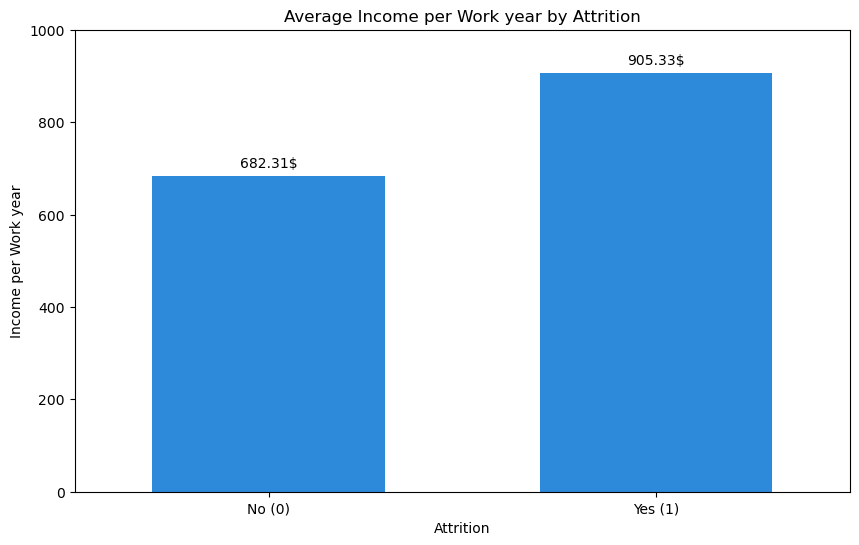

In [42]:
# 퇴사 여부 별 Income_per_Workyear을 평균 계산
attrition_rate = ads.groupby('Attrition')['Income_per_Workyear'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='Attrition', y='Income_per_Workyear', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Average Income per Work year by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Income per Work year')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 20,   # 세로 위치
            f"{p.get_height():.2f}$",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 1000)
plt.show()

In [43]:
# Attrition이 'Yes'인 그룹과 'No'인 그룹으로 Income_per_Workyear 데이터 분리
attr_yes = ads[ads['Attrition'] == 1]['Income_per_Workyear']
attr_no = ads[ads['Attrition'] == 0]['Income_per_Workyear']

# 독립 표본 t-test 수행
t_stat, p_value = ttest_ind(attr_yes, attr_no)

# p-value 출력
print(f"P-value: {p_value}")

P-value: 6.899147859801786e-11


In [44]:
# 업무 성과별 Income_per_Workyear를 확인
# 업무 성과가 더 높은 사람들의 Income_per_Workyear가 더 낮음
ads.groupby('PerformanceRating')['Income_per_Workyear'].agg(['mean', 'median', 'max'])

,mean,median,max
PerformanceRating,,,
3,722.953615,609.059524,2994.0
4,692.465415,558.100000,2795.0


In [45]:
# 업무 성과별 퇴사율의 차이는 별로 없어보인다.
ads.groupby('PerformanceRating')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
PerformanceRating,,
3,0.839228,0.160772
4,0.836283,0.163717


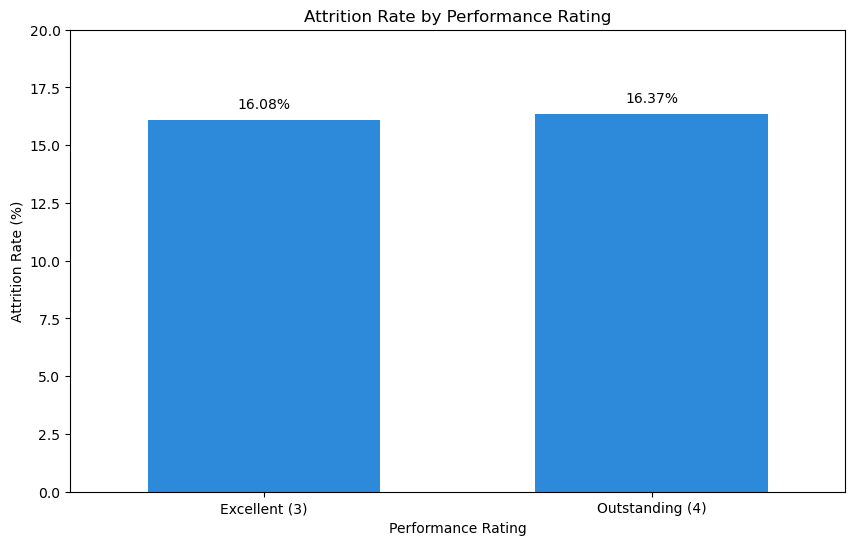

In [46]:
# 업무 성과 별로 Attrition의 평균을 계산하여 Attrition 비율을 구함
attrition_rate = ads.groupby('PerformanceRating')['Attrition'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='PerformanceRating', y='Attrition', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Attrition Rate by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Attrition Rate (%)')
plt.xticks(ticks=[0, 1], labels=['Excellent (3)', 'Outstanding (4)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 0.5,   # 세로 위치
            f"{p.get_height():.2f}%",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 20)
plt.show()

In [47]:
# 업무 성과별 퇴사별 Income_per_Workyear 확인
ads.groupby(['PerformanceRating','Attrition'])['Income_per_Workyear'].agg(['mean', 'median', 'max'])

mean      median     max
PerformanceRating Attrition                                
3                 0          687.118532  601.111111  2994.0
                  1          910.012747  709.428571  2973.0
4                 0          655.745243  553.727273  2693.0
                  1          880.036020  674.888889  2795.0

In [48]:
# 4. 동료와의 관계에 따른 퇴사 비율차이 확인
ads.groupby('RelationshipSatisfaction')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148


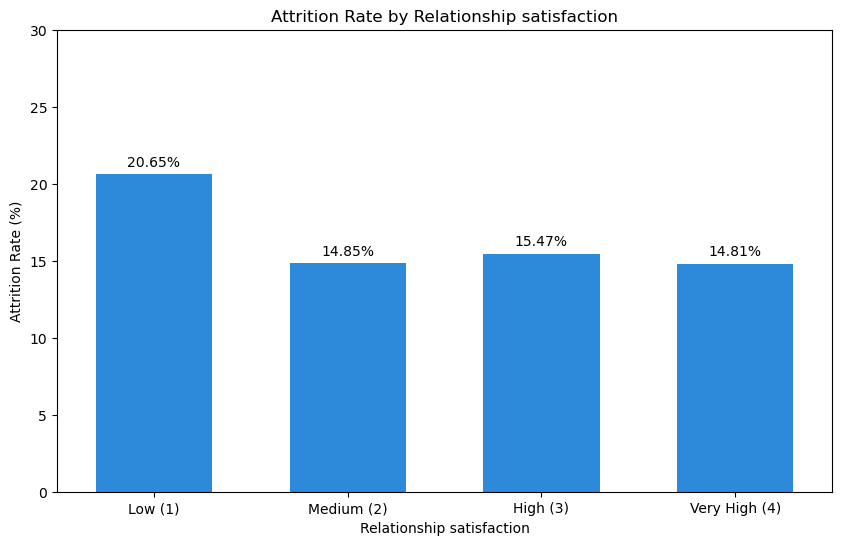

In [49]:
# 동료 관계 만족도 별로 Attrition의 평균을 계산하여 Attrition 비율을 구함
attrition_rate = ads.groupby('RelationshipSatisfaction')['Attrition'].mean().sort_values(ascending=False).reset_index()

# 결과에서 Attrition 비율을 백분율로 변환
attrition_rate['Attrition'] *= 100

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='RelationshipSatisfaction', y='Attrition', data=attrition_rate, color='#118BF5', width=0.6)
plt.title('Attrition Rate by Relationship satisfaction')
plt.xlabel('Relationship satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low (1)', 'Medium (2)', 'High (3)', 'Very High (4)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height() + 0.5,   # 세로 위치
            f"{p.get_height():.2f}%",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로
ax.set_ylim(0, 30)
plt.show()

In [50]:
# 동료와의 관계 만족도가 Low이면 1 나머지는 2으로 재범주화
ads['RlSf_cat'] = ads['RelationshipSatisfaction'].apply( lambda x : 1 if x == 1 else 2)

# 비율 확인
ads.groupby('RlSf_cat')['Attrition'].value_counts(normalize=True).unstack()

Attrition,0,1
RlSf_cat,,
1,0.793478,0.206522
2,0.849246,0.150754


In [51]:
# 귀무가설 : 동료와의 관계 만족도에 따른 퇴사 비율은 차이가 없다.
# 카이제곱 검정 
# p-value < 0.05으로 귀무가설을 기각한다.
# 동료와의 관계 만족도에 따른 퇴사 비율의 차이가 있다.
contingency_table = pd.crosstab(ads['RlSf_cat'], ads['Attrition'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# p-value 출력
print(f"p-value: {p}")

p-value: 0.02927153156520746


In [70]:
# 최종 변수들 선택 후 로지스틱 회귀분석
# 독립변수, 종속변수 정의
X = ads[['JbSf_cat', 'BusinessTravel', 'DistanceFromHome', 'WLB_cat', 'EnSf_cat', 
         'OverTime', 'Income_per_Workyear', 'PerformanceRating', 'RlSf_cat']]
y = ads['Attrition']

# 로지스틱 회귀 모델 구축 및 학습
model = sm.Logit(y, X).fit()

# 모델 요약 결과 출력
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.367984
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1461
Method:                           MLE   Df Model:                            8
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.1669
Time:                        13:16:30   Log-Likelihood:                -540.94
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.908e-42
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
JbSf_cat               -0.6314      0.171     -3.683      0.000      -0.967      -0.295
Bu

In [68]:
odds = np.exp(model.params).reset_index()
odds

,index,0
0,JbSf_cat,0.531831
1,BusinessTravel,2.222976
2,DistanceFromHome,1.031889
3,WLB_cat,0.426928
4,EnSf_cat,0.387651
5,OverTime,4.658212
6,Income_per_Workyear,1.000952
7,PerformanceRating,1.117883
8,RlSf_cat,0.596041
